#### STEP 1:

In [11]:
import csv

# Function that deletes multiple elements in a list
def delete_multiple_element(list_object, indices):
    indices = sorted(indices, reverse=True)
    for idx in indices:
        if idx < len(list_object):
            list_object.pop(idx)

with open("./used_cars_dataset.csv", encoding = "ISO-8859-1") as file:
    # Read initial file
    csv_reader = csv.reader(file)
    # Retrieve headers of the columns
    header = next(csv_reader)
    # Retrieve rows of the csv file
    rows = []
    for row in csv_reader:
        rows.append(row)
    # Retrieve headers indexes
    index_VT = header.index('vehicleType')
    index_price = header.index('price')
    index_brand = header.index('brand')
    index_month_registration = header.index('monthOfRegistration')
    
    # Filter all missing/invalid data
    to_be_deleted = []
    for idx, r in enumerate(rows):
        if r[index_brand] == '' or r[index_VT] == '' or (int(r[index_price]) < 1000 or int(r[index_price]) > 100000) or (int(r[index_month_registration]) < 1 and int(r[index_month_registration]) > 12):
            to_be_deleted.append(idx)
    # Remove invalid data
    delete_multiple_element(rows, to_be_deleted)

    # Save to a new csv file
    with open('./used_cars_filtered.csv', 'w') as f:
        write = csv.writer(f)
        write.writerow(header)
        write.writerows(rows)

#### STEP 2:

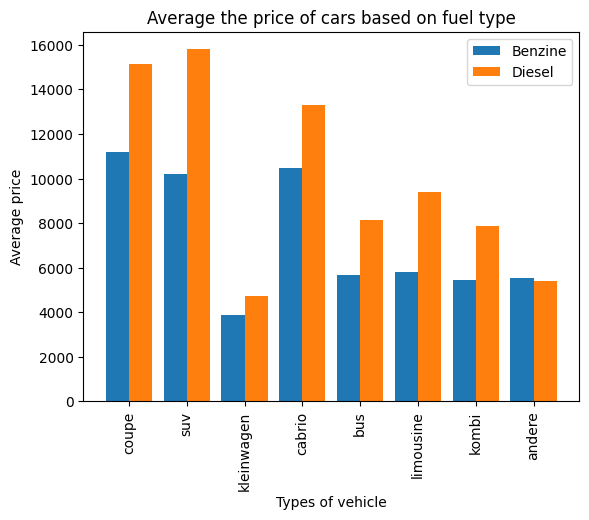

In [12]:
import csv
import numpy as np
import matplotlib.pyplot as plt

with open("./used_cars_filtered.csv", encoding = "ISO-8859-1") as file:
    csv_reader = csv.reader(file)
    header = next(csv_reader)
    rows = []
    for row in csv_reader:
        rows.append(row)
    index_VT = header.index('vehicleType')
    index_price = header.index('price')
    index_fuel_type = header.index('fuelType')
    benzine_vehicles = {}
    diesel_vehicles = {}
    for r in rows:
        if r[index_VT] not in list(benzine_vehicles.keys()) and r[index_VT] not in list(diesel_vehicles.keys()):
            benzine_vehicles[r[index_VT]] = [0, 0]
            diesel_vehicles[r[index_VT]] = [0, 0]
        if r[index_fuel_type] == "diesel":
            diesel_vehicles[r[index_VT]] = [diesel_vehicles[r[index_VT]][0] + 1, diesel_vehicles[r[index_VT]][1] + int(r[index_price])]
        elif r[index_fuel_type] == "benzin":
            benzine_vehicles[r[index_VT]] = [benzine_vehicles[r[index_VT]][0] + 1, benzine_vehicles[r[index_VT]][1] + int(r[index_price])]
    vehicle_types = list(benzine_vehicles.keys())

benzine_average = []
for k, v in benzine_vehicles.items():
    benzine_average.append(v[1]/v[0])

diesel_average = []
for k, v in diesel_vehicles.items():
    diesel_average.append(v[1]/v[0])
  
X_axis = np.arange(len(vehicle_types))
  
plt.bar(X_axis - 0.2, benzine_average, 0.4, label = 'Benzine')
plt.bar(X_axis + 0.2, diesel_average, 0.4, label = 'Diesel')
  
plt.xticks(X_axis, vehicle_types)
plt.xlabel("Types of vehicle")
plt.xticks(rotation=90)
plt.ylabel("Average price")
plt.title("Average the price of cars based on fuel type")
plt.legend()
plt.show()

#### STEP 3: 

/var/folders/65/z544d_7s145fcz5k2nnwg0fr0000gn/T/ipykernel_49380/588565434.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(brands)


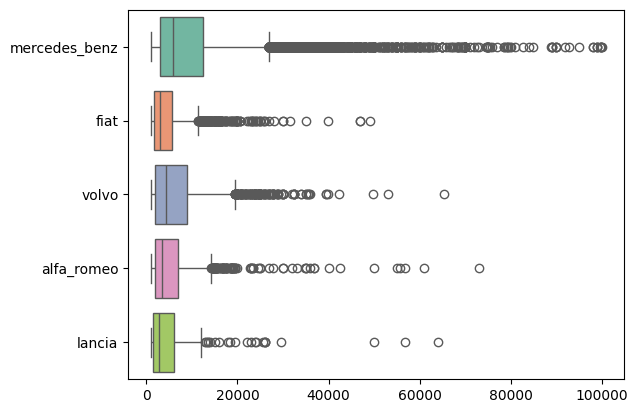

In [13]:
import seaborn as sns
brands = ["mercedes_benz", "fiat", "volvo", "alfa_romeo", "lancia"]
all_data = []

with open("./used_cars_filtered.csv", encoding = "ISO-8859-1") as file:
    csv_reader = csv.reader(file)
    header = next(csv_reader)
    rows = []
    for row in csv_reader:
        rows.append(row)
    index_brand = header.index('brand')
    index_price = header.index('price')
    for b in brands:
        tmp = []
        for r in rows:
            if r[index_brand] == b:
                tmp.append(int(r[index_price]))
        all_data.append(tmp)

brands = ["mercedes_benz", "fiat", "volvo", "alfa_romeo", "lancia"]
ax = sns.boxplot(data=all_data, orient="h", palette="Set2")
ax.set_yticklabels(brands)
plt.show()

#### STEP 4:

An example table format is shown below:

<table>
    <tr>
        <th></th>
        <th colspan="3">Powerful</th> 
        <th></th>
        <th colspan="3">Not Powerful</th>
        <th></th>
  </tr>
    <tr>
    <th></th>
    <th>RB1</th>
    <th>RB2</th>
    <th>RB3</th>
    <th>RB4</th>
    <th>RB1</th>
    <th>RB2</th>
    <th>RB3</th>
    <th>RB4</th>
  </tr>
  <tr>
    <th>Audi</th>
    <td>PR</td>
    <td>PR</td>
    <td>PR</td>
    <td>PR</td>
    <td>PR</td>
    <td>PR</td>
    <td>PR</td>
    <td>PR</td>
  </tr>
  <tr>
    <td colspan="5">...</td>
    <td colspan="4"> </td>
  </tr>
  <tr>
    <th>Skoda</th>
    <td>PR</td>
    <td>PR</td>
    <td>PR</td>
    <td>PR</td>
    <td>PR</td>
    <td>PR</td>
    <td>PR</td>
    <td>PR</td>
   </tr>
</table>

RBn = Year of registration bin n
<br>
PR = Price range

In [14]:
import pandas as pd

df_cars = pd.read_csv('used_cars_filtered.csv')
median = df_cars['powerPS'].median()

df_cars['is_powerful'] = df_cars['powerPS'] > median
all_cars = df_cars[(df_cars.yearOfRegistration > 1960) & (df_cars.yearOfRegistration < 2020)]
bins = pd.cut(all_cars.yearOfRegistration, range(1960, 2021, 15))
all_cars.pivot_table(index='brand', columns=['is_powerful', bins], values=['price'], aggfunc=lambda a: (a.min(), a.max()))

/var/folders/65/z544d_7s145fcz5k2nnwg0fr0000gn/T/ipykernel_49380/82243576.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  all_cars.pivot_table(index='brand', columns=['is_powerful', bins], values=['price'], aggfunc=lambda a: (a.min(), a.max()))


price                                \
is_powerful                  False                                 
yearOfRegistration    (1960, 1975]   (1975, 1990]   (1990, 2005]   
brand                                                              
BMW                            NaN            NaN            NaN   
alfa_romeo           (5900, 73000)  (1100, 18500)  (1000, 16950)   
audi                 (1400, 29000)  (1000, 36000)  (1000, 84911)   
bmw                  (1499, 26999)  (1000, 25500)  (1000, 26500)   
bmw                            NaN            NaN            NaN   
chevrolet            (8400, 34900)  (1500, 27999)  (1000, 39900)   
chrysler              (3900, 6800)   (1300, 8500)  (1000, 11750)   
citroen              (1200, 36500)  (1000, 22000)  (1000, 33000)   
dacia                          NaN            NaN   (1100, 3500)   
daewoo                         NaN            NaN   (1000, 3300)   
daihatsu                       NaN   (3500, 3600)   (1000, 8500)   
fiat                 (1000, 23999)  (1000, 25000)  (1000, 19500)   
ford                 (1000, 62000)  (1000, 39900)  (1000, 17000)   
honda                (2250, 19000)  (1100, 10000)  (1000, 39900)   
hyundai                        NaN            NaN   (1000, 5800)   
jaguar               (5900, 55000)  (9850, 34900)   (1000, 5999)   
jeep                 (4670, 24900)  (1500, 17900)  (1000, 19500)   
kia                            NaN            NaN  (1000, 10000)   
lada                  (1100, 5600)   (1249, 9900)   (1000, 7300)   
lancia               (5445, 22900)  (1450, 19500)  (1000, 13900)   
land_rover           (6300, 32000)  (3000, 17990)  (1000, 17000)   
mazda                 (1750, 1750)  (1100, 18200)  (1000, 11500)   
mercedes_benz        (1000, 98000)  (1000, 32500)  (1000, 99999)   
mini                 (4999, 24850)  (1499, 30000)  (1200, 18000)   
mitsubishi                     NaN   (1090, 3999)  (1000, 12500)   
nissan                         NaN  (1000, 15000)  (1000, 99999)   
opel                 (1150, 27899)  (1000, 24990)  (1000, 17500)   
peugeot              (1650, 23500)  (1000, 16800)  (1000, 11850)   
porsche              (1500, 99000)  (1800, 69900)  (1400, 95964)   
renault              (1100, 93000)   (1000, 9500)  (1000, 15699)   
rover                 (4200, 4300)  (2500, 10500)  (1000, 24900)   
saab                  (2350, 2350)   (1400, 9950)   (1100, 5999)   
seat                           NaN   (1100, 1100)   (1000, 8500)   
skoda                (1200, 19500)  (1200, 12600)   (1000, 7800)   
smart                          NaN            NaN  (1000, 40000)   
sonstige_autos       (1100, 85000)  (1000, 99999)  (1000, 99999)   
subaru              (10500, 10500)   (1300, 5000)  (1000, 14999)   
suzuki                         NaN   (1000, 7500)   (1000, 8150)   
toyota                (6000, 6000)  (1000, 34900)  (1000, 19500)   
trabant              (1300, 11800)  (1000, 10500)  (1500, 14500)   
volkswagen           (1000, 85000)  (1000, 62500)  (1000, 30000)   
volvo                (1499, 53000)  (1000, 14950)  (1000, 13500)   

                                                                   \
is_powerful                                  True                   
yearOfRegistration    (2005, 2020]    (1960, 1975]   (1975, 1990]   
brand                                                               
BMW                            NaN             NaN            NaN   
alfa_romeo           (1500, 18200)   (4450, 49999)  (1500, 33000)   
audi                 (1150, 84000)             NaN  (1000, 80000)   
bmw                  (1300, 73500)   (5000, 42750)  (1000, 79900)   
bmw                            NaN             NaN            NaN   
chevrolet            (1000, 30000)   (1200, 65500)  (1500, 26650)   
chrysler             (1500, 15750)   (2000, 37500)  (1200, 12500)   
citroen              (1200, 28000)  (15900, 27000)   (1999, 8599)   
dacia                (1000, 19990)             NaN            NaN   
dae

In [15]:
pd.DataFrame(df_cars.groupby("brand").apply(lambda x: x.model.value_counts().iloc[:3]))

/var/folders/65/z544d_7s145fcz5k2nnwg0fr0000gn/T/ipykernel_49380/3578416815.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pd.DataFrame(df_cars.groupby("brand").apply(lambda x: x.model.value_counts().iloc[:3]))


count
brand      model        
BMW        3er         2
alfa_romeo andere    452
           147       398
           156       347
audi       a4       8517
...                  ...
volkswagen passat   8104
           polo     7104
volvo      v70       513
           andere    423
           v40       373

[119 rows x 1 columns]

#### STEP 5:

/var/folders/65/z544d_7s145fcz5k2nnwg0fr0000gn/T/ipykernel_49380/4096389764.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=all_cars_price, orient="h", palette="Set2", y="bins_price", x="yearOfRegistration" )


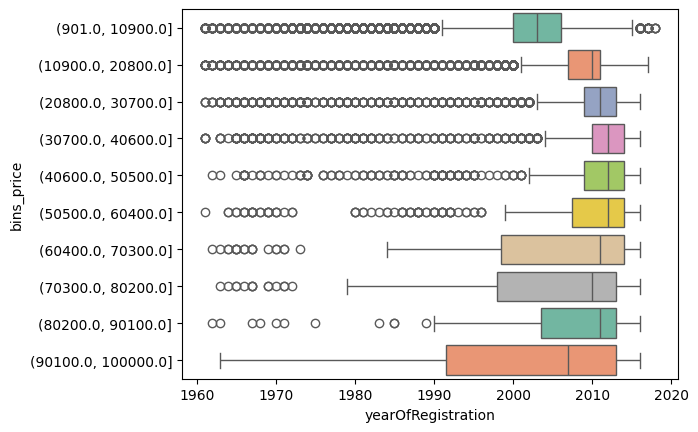

In [16]:
import seaborn as sns

all_cars_price = df_cars[(df_cars.price > 0) & (df_cars.price <= 100000) & (df_cars.yearOfRegistration > 1960) & (df_cars.yearOfRegistration < 2020)]
all_cars_price = all_cars_price.assign(bins_price = pd.cut(all_cars_price.price, 10))

ax = sns.boxplot(data=all_cars_price, orient="h", palette="Set2", y="bins_price", x="yearOfRegistration" )

#### STEP 6:

In [17]:
bins_kilometer = pd.cut(df_cars.kilometer, 6)

df_cars.groupby(["vehicleType", bins_kilometer]).size().unstack()

/var/folders/65/z544d_7s145fcz5k2nnwg0fr0000gn/T/ipykernel_49380/1315154601.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cars.groupby(["vehicleType", bins_kilometer]).size().unstack()


kilometer,"(4855.0, 29166.667]","(29166.667, 53333.333]","(53333.333, 77500.0]","(77500.0, 101666.667]","(101666.667, 125833.333]","(125833.333, 150000.0]"
vehicleType,,,,,,
andere,193,157,114,229,198,1526
bus,831,1400,1400,2717,2495,18574
cabrio,877,2169,1978,3821,2960,9517
coupe,680,1100,1092,2110,1924,9177
kleinwagen,2376,5589,4831,9214,7865,21696
kombi,1085,1995,1798,4163,4441,42102
limousine,2349,4489,4234,8996,8537,49981
suv,844,1412,1238,1984,1541,7146
